In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
from keras.datasets import mnist 

(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # Load handwritten digit dataset

test_images_copy = test_images
test_labels_copy = test_labels

print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


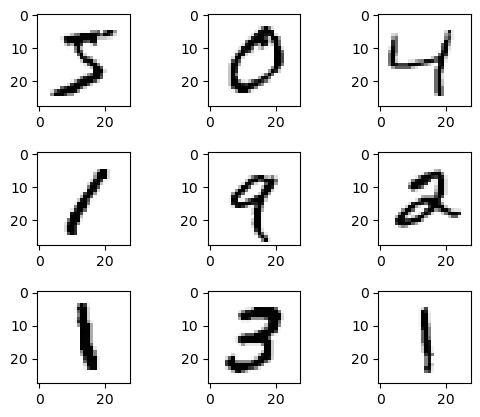

Acutal:
[[5. 0. 4.]
 [1. 9. 2.]
 [1. 3. 1.]]


In [2]:
def show_mnist(images,labels):
    n = 3
    m = 3
    fig = plt.figure()
    arr = np.zeros([m,n])
    for i in range(n):
        for j in range(m):
            plt.subplot(n,m,i*n+j+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.5)
            index = i * n + j
            img_array = images[index]
            img = Image.fromarray(img_array)
            arr[i,j]=labels[index]
            plt.imshow(img,cmap='Greys')
    plt.show()
    print("Acutal:")
    print(arr)
    
show_mnist(train_images,train_labels)                                   # Sample data visualization

In [3]:
train_images = train_images.reshape((60000, 28 * 28))                   # Data Preprocessing -- Reshape
train_images = train_images.astype('float32') / 255                     # Data Preprocessing -- Scaling

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tensorflow.keras.utils.to_categorical(train_labels,10)
test_labels = tensorflow.keras.utils.to_categorical(test_labels,10)

network = Sequential()                                                  # 3-layer Neural Network
keras.Input(shape=(28 * 28,))                                           # Input layer
network.add(Dense(300, activation='relu'))                              # Hidden layer
network.add(Dense(10, activation='softmax'))                            # Output layer

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("\nTraining starts")
network.fit(train_images, train_labels, epochs=3, batch_size=128)       # Training
print("Training ends")

print("\nTesting starts")
test_loss, test_acc = network.evaluate(test_images, test_labels)        # Testing
print("Testing ends\n")
print('test_accuracy:', test_acc)


Training starts
Epoch 1/3
469/469 [==============================] - 3s 4ms/step - loss: 0.2994 - accuracy: 0.9155
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1278 - accuracy: 0.9633
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9748
Training ends

Testing starts
313/313 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9729
Testing ends

test_accuracy: 0.9728999733924866


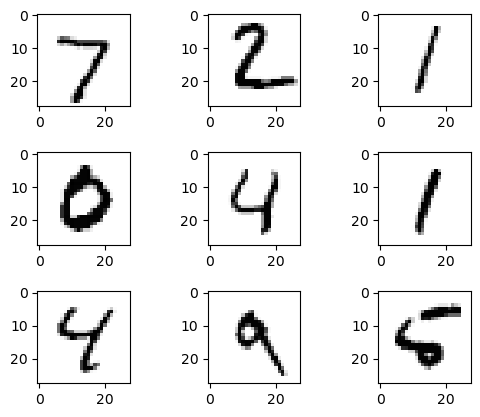

Acutal:
[[7. 2. 1.]
 [0. 4. 1.]
 [4. 9. 5.]]
1/1 [==============================] - 0s 33ms/step

Predicted:
[[7. 2. 1.]
 [0. 4. 1.]
 [4. 9. 6.]]


In [4]:
show_mnist(test_images_copy,test_labels_copy)
arr1 = np.zeros([3,3])
for i in range(3):
    for j in range(3):
     index = i * 3 + j   
     x=tensorflow.reshape(test_images[index],(1,28*28))
     arr1[i,j] = np.argmax(network.predict(x))                          # Prediction
print("\nPredicted:")
print(arr1)

In [5]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import matplotlib
from keras.datasets import mnist 

(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # Load handwritten digit dataset

test_images_copy = test_images
test_labels_copy = test_labels

def show_mnist(images,labels):
    n = 3
    m = 3
    fig = plt.figure()
    arr = np.zeros([m,n])
    for i in range(n):
        for j in range(m):
            plt.subplot(n,m,i*n+j+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.5)
            index = i * n + j
            img_array = images[index]
            img = Image.fromarray(img_array)
            arr[i,j]=labels[index]
            plt.imshow(img,cmap='Greys')
    plt.show()
    print("Acutal:")
    print(arr)
    

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tensorflow.keras.utils.to_categorical(train_labels,10)
test_labels = tensorflow.keras.utils.to_categorical(test_labels,10)

network = Sequential()                                             # 4-layer Neural Network
keras.Input(shape=(28 * 28,))                                      # Input layer
network.add(Dense(300, activation='relu'))                         # Hidden layer 1
network.add(Dense(400, activation='relu'))                         # Hidden layer 2
network.add(Dense(10, activation='softmax'))                       # Output layer

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("\nTraining starts")
network.fit(train_images, train_labels, epochs=3, batch_size=128)
print("Training ends")

print("\nTesting starts")
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Testing ends\n")
print('test_accuracy:', test_acc)



Training starts
Epoch 1/3
469/469 [==============================] - 4s 5ms/step - loss: 0.2451 - accuracy: 0.9295
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.0912 - accuracy: 0.9719
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.0561 - accuracy: 0.9826
Training ends

Testing starts
313/313 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9714
Testing ends

test_accuracy: 0.9714000225067139


In [ ]:
show_mnist(test_images_copy,test_labels_copy)
arr1 = np.zeros([3,3])
for i in range(3):
    for j in range(3):
     index = i * 3 + j   
     x=tensorflow.reshape(test_images[index],(1,28*28))
     arr1[i,j] = np.argmax(network.predict(x))                      # Prediction
print("\nPredicted:")
print(arr1)

: 

: 